# IMU Coarse Calibration using Local Gravity Vector

Notebook to implement and test the *Inertial Navigation Unit* calibration framework presented by:
1. *D. Tedaldi, A. Pretto and E. Menegatti, "A robust and easy to implement method for IMU calibration without external equipments," 2014 IEEE International Conference on Robotics and Automation (ICRA), Hong Kong, China, 2014, pp. 3042-3049, doi: 10.1109/ICRA.2014.6907297.* 

In [1]:
import os
import numpy as np
import pandas as pd
import math

In [18]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
plt.rcParams['figure.figsize'] = (14,6)

In [3]:
path_data = os.path.join('data/AVPlots1.csv' )
headers = ['time', 'ax', 'ay', 'az', 'gx', 'gy', 'gz']

In [4]:
df = pd.read_csv(path_data, names=headers)
df.head()

,time,ax,ay,az,gx,gy,gz
0,1.676352e+09,-966,-500,16534,-120,106,-29
1,1.676352e+09,-972,-506,16553,-121,106,-27
2,1.676352e+09,-968,-491,16570,-122,102,-24
3,1.676352e+09,-977,-493,16546,-122,104,-25
4,1.676352e+09,-968,-483,16551,-122,104,-30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618131 entries, 0 to 618130
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    618131 non-null  float64
 1   ax      618131 non-null  int64  
 2   ay      618131 non-null  int64  
 3   az      618131 non-null  int64  
 4   gx      618131 non-null  int64  
 5   gy      618131 non-null  int64  
 6   gz      618131 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 33.0 MB


In [8]:
df['time'] = df['time'] - df['time'].loc[0]

From here initialization period $T_{init}$ = 60s.

In [13]:
def windowedVariance(arrAx, arrAy, arrAz, tw=2, fs=100):
    
    winLen = fs*tw                  # Data Point in Window
    halfWin = int(winLen/2)         # Half window for centered variance
    arrLen = arrAx.size
    
    arrAx = np.copy(arrAx)
    arrAy = np.copy(arrAy)
    arrAz = np.copy(arrAz)

    # Add head and tail to dataset (hold) for windowed methods
    arrAx = np.concatenate((arrAx[0] * np.ones(halfWin), arrAx, arrAx[-1] * np.ones(halfWin)))
    arrAy = np.concatenate((arrAy[0] * np.ones(halfWin), arrAy, arrAx[-1] * np.ones(halfWin)))
    arrAz = np.concatenate((arrAz[0] * np.ones(halfWin), arrAz, arrAy[-1] * np.ones(halfWin)))

    varArr = np.empty(arrLen)

    for i in range(halfWin, arrLen-halfWin):
        varArr[i] = math.sqrt(
                        math.pow(np.var(arrAx[i-halfWin:i+halfWin]),2) + \
                        math.pow(np.var(arrAy[i-halfWin:i+halfWin]),2) + \
                        math.pow(np.var(arrAz[i-halfWin:i+halfWin]), 2)
        )
    
    return varArr

In [14]:
%timeit
windwdVarArr = windowedVariance(np.array(df['ax']), np.array(df['ay']), np.array(df['az']))

Text(0.5, 0, 'time/s')

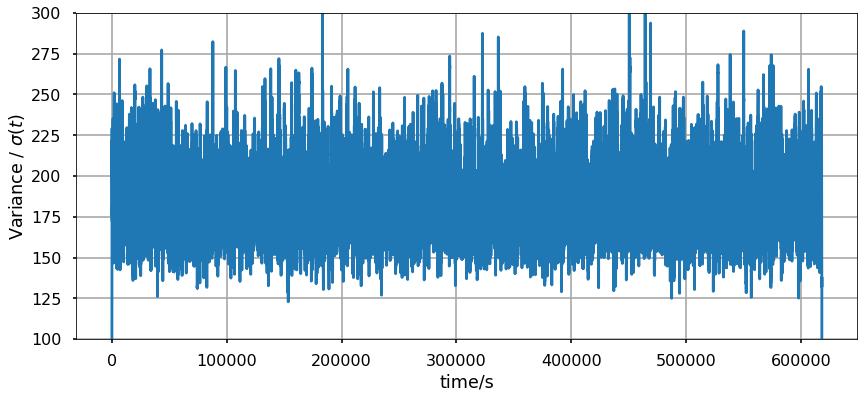

In [25]:
plt.plot(windwdVarArr)
plt.grid(True, which='both',ls='-',color='0.65')
plt.ylim([100, 300])
plt.ylabel(r'Variance / $\sigma(t)$')
plt.xlabel('time / s')